# Exercise 4: Data Preparation and Preprocessing

--------------------

In this exercise, we will work with the iris data set again. The task of this week is to investigate different preprocessing steps such as principal component analysis and linear discriminant analysis. In a further step, the influence of these preprocessing steps on the classification with the k-nearest-neighbor classifier will be investigated.

------------------------

## Task 1: Load data
Load the iris data set into a *pandas* dataframe.

In [2]:
import pandas as pd

# Veri dosyasının yolu
data_path = r'C:\Users\bbayr\Desktop\Dersler\Machine Learning Applications\Exercise\Exercise III Exploratory Data Analysis\Data_iris-20241111\bezdekIris.data'

# Veri dosyasını yükle
df = pd.read_csv(data_path, header=None)

# Bilgi dosyasının yolu (kolon adları için)
info_path = r'C:\Users\bbayr\Desktop\Dersler\Machine Learning Applications\Exercise\Exercise III Exploratory Data Analysis\Data_iris-20241111\iris.names'

# Kolon adlarını manuel olarak belirliyoruz çünkü bilgi dosyasını önceden incelememiz gerekebilir
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Veri setine kolon adlarını ekleyelim
df.columns = column_names

# İlk 5 satırı inceleyelim
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


## Task 2: Scaling

The k-nearest-neighbor algorithm that we will use for classification is a distance-based algorithm. Since the distance between different data points in the feature space depends strongly on the scaling of the features, the results of the k-nearest-neighbor algorithm will also change with different scaling.

To eliminate this influence, it is useful to normalize the data. Perform the normalization of the features and examine the resulting scaled feature distributions to see the differences from the unscaled distributions.

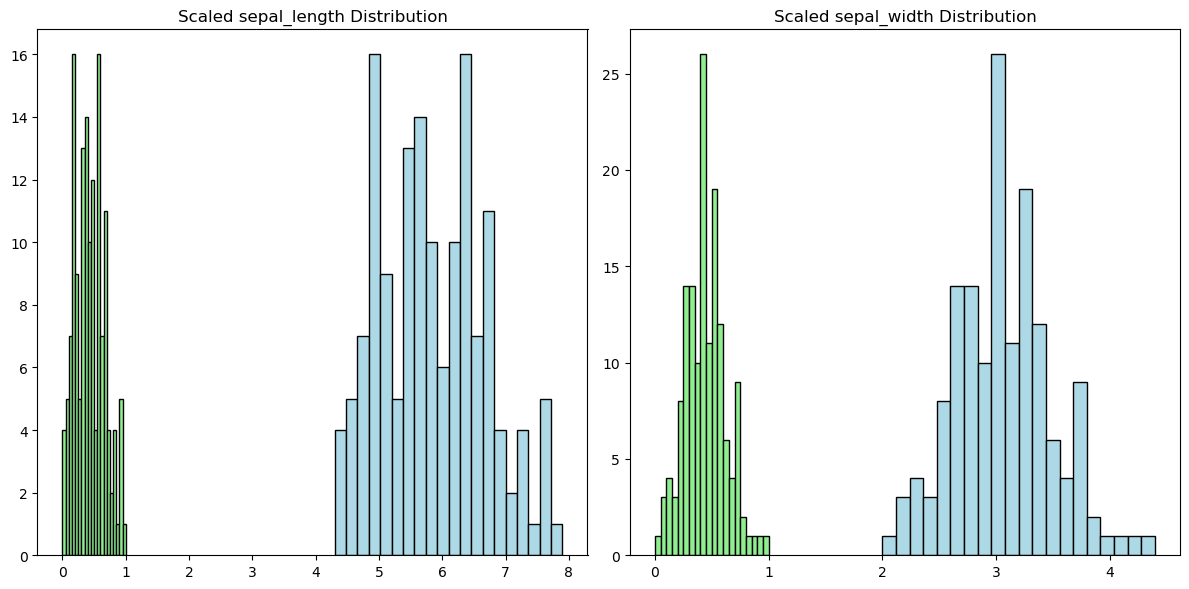

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Veri dosyasını yükle
data_path = r'C:\Users\bbayr\Desktop\Dersler\Machine Learning Applications\Exercise\Exercise III Exploratory Data Analysis\Data_iris-20241111\bezdekIris.data'

# Veri setini yükleyelim
df = pd.read_csv(data_path, header=None)

# Kolon adlarını ekleyelim
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.columns = column_names

# Sadece özellikleri seçelim (class dışındaki tüm kolonlar)
features = df.drop('class', axis=1)

# Min-Max Scaling (veri normalizasyonu)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Ölçeklenmiş verileri DataFrame'e çevirelim
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Orijinal ve ölçeklenmiş verilerin dağılımlarını karşılaştıralım
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Orijinal veri dağılımı
for ax, column in zip(axes, features.columns):
    ax.hist(features[column], bins=20, color='lightblue', edgecolor='black')
    ax.set_title(f'Original {column} Distribution')

# Ölçeklenmiş veri dağılımı
for ax, column in zip(axes, scaled_df.columns):
    ax.hist(scaled_df[column], bins=20, color='lightgreen', edgecolor='black')
    ax.set_title(f'Scaled {column} Distribution')

plt.tight_layout()
plt.show()


## Task 3: PCA

We now want to explore several dimensionality reduction methods, starting with a principal component analysis to extract the features that explain most of the variance in the data set.

a) Use scikit-learn to perform principal component analysis on the scaled features and plot the first two principal components. How well can these first two components separate the classes?

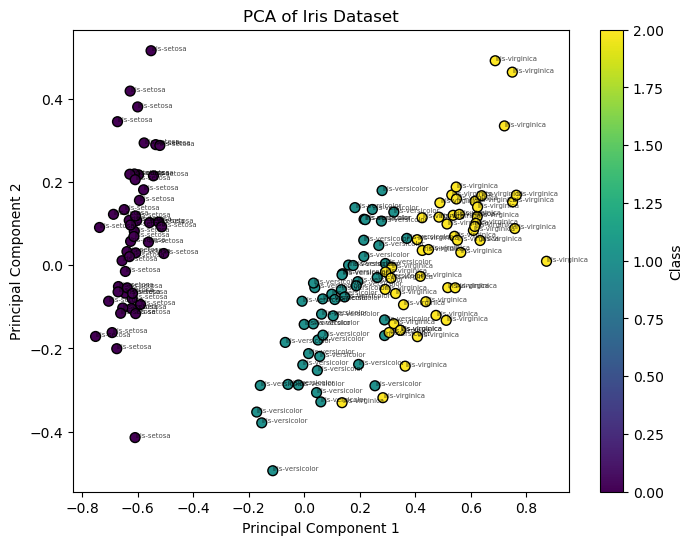

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Veri dosyasını yükle
data_path = r'C:\Users\bbayr\Desktop\Dersler\Machine Learning Applications\Exercise\Exercise III Exploratory Data Analysis\Data_iris-20241111\bezdekIris.data'

# Veri setini yükleyelim
df = pd.read_csv(data_path, header=None)

# Kolon adlarını ekleyelim
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.columns = column_names

# Özellikleri ve sınıf etiketlerini ayıralım
features = df.drop('class', axis=1)
labels = df['class']

# Min-Max Scaling (veri normalizasyonu)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# PCA uygulaması
pca = PCA(n_components=2)  # İlk iki bileşeni alıyoruz
pca_result = pca.fit_transform(scaled_features)

# PCA'nın ilk iki bileşenini DataFrame'e ekleyelim
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Görselleştirme: PCA'nın ilk iki bileşeni ile veriyi çizme
plt.figure(figsize=(8, 6))

# Farklı sınıflar için farklı renkler kullanıyoruz
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pd.Categorical(labels).codes, cmap='viridis', edgecolor='k', s=50)

# Eksen etiketleri ve başlık
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')

# Sınıf etiketlerini ekleyelim
for i, label in enumerate(df['class']):
    plt.annotate(label, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=5, alpha=0.7)

plt.colorbar(label='Class')
plt.show()


b) Look at the variance explained by the principal components. How many dimensions can the data set be reduced to if we want to explain at least 90 % of the total variance?

Explained Variance Ratio for Each Component:
[0.84136038 0.11751808 0.03473561 0.00638592]

Cumulative Variance Explained:
[0.84136038 0.95887846 0.99361408 1.        ]

Number of components needed to explain at least 90% of the variance: 2


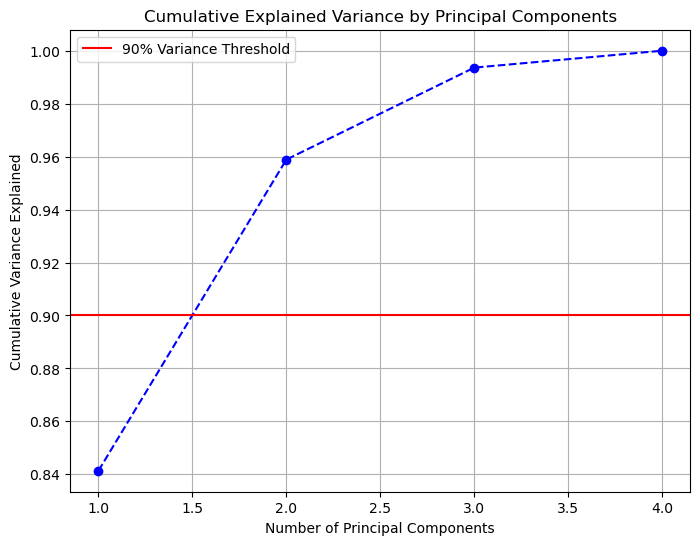

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Veri dosyasını yükle
data_path = r'C:\Users\bbayr\Desktop\Dersler\Machine Learning Applications\Exercise\Exercise III Exploratory Data Analysis\Data_iris-20241111\bezdekIris.data'

# Veri setini yükleyelim
df = pd.read_csv(data_path, header=None)

# Kolon adlarını ekleyelim
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.columns = column_names

# Özellikleri ve sınıf etiketlerini ayıralım
features = df.drop('class', axis=1)

# Min-Max Scaling (veri normalizasyonu)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# PCA uygulaması
pca = PCA()  # Tüm bileşenleri hesaplamak için
pca.fit(scaled_features)

# Varyans oranlarını ve toplam varyansı inceleyelim
explained_variance_ratio = pca.explained_variance_ratio_

# Her bir bileşenin açıklayacağı varyans oranlarını yazdıralım
print("Explained Variance Ratio for Each Component:")
print(explained_variance_ratio)

# Toplam varyansın %90'ını açıklayan bileşen sayısını bulalım
cumulative_variance = explained_variance_ratio.cumsum()
print("\nCumulative Variance Explained:")
print(cumulative_variance)

# %90 varyansı açıklayan bileşen sayısını bulalım
components_needed = (cumulative_variance >= 0.90).argmax() + 1
print(f"\nNumber of components needed to explain at least 90% of the variance: {components_needed}")

# Görselleştirme: Varyans oranlarının birikimli grafik ile gösterimi
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.90, color='r', linestyle='-', label="90% Variance Threshold")
plt.title("Cumulative Explained Variance by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.legend()
plt.grid(True)
plt.show()


c) For better interpretation, it is interesting to examine the importance of the features in constructing the principal components. Take a look at the transformation matrix and examine the influence of the different features on the principal components.

Transformation Matrix (Principal Components and Feature Contributions):
     sepal_length  sepal_width  petal_length  petal_width
PC1      0.424942    -0.150748      0.616267     0.645689
PC2      0.423203     0.903967     -0.060383    -0.009839
PC3      0.713572    -0.336316      0.065900    -0.611035
PC4     -0.362130     0.216818      0.782449    -0.457849


<Figure size 1000x600 with 0 Axes>

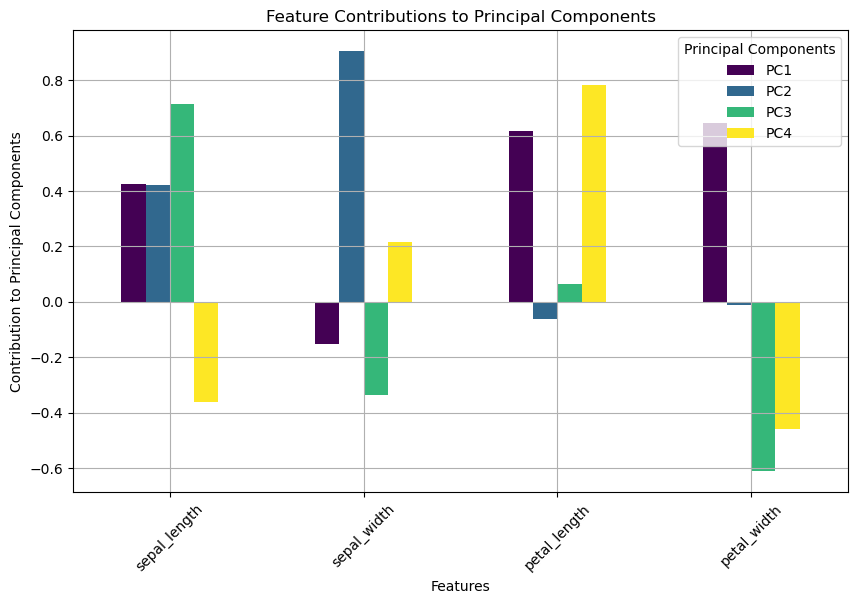

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Veri dosyasını yükle
data_path = r'C:\Users\bbayr\Desktop\Dersler\Machine Learning Applications\Exercise\Exercise III Exploratory Data Analysis\Data_iris-20241111\bezdekIris.data'

# Veri setini yükleyelim
df = pd.read_csv(data_path, header=None)

# Kolon adlarını ekleyelim
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.columns = column_names

# Özellikleri ve sınıf etiketlerini ayıralım
features = df.drop('class', axis=1)

# Min-Max Scaling (veri normalizasyonu)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# PCA uygulaması
pca = PCA()  # Tüm bileşenleri hesaplamak için
pca.fit(scaled_features)

# Dönüşüm matrisini (feature contributions) alalım
transformation_matrix = pca.components_

# DataFrame'e çevirerek daha kolay inceleyelim
transformation_df = pd.DataFrame(transformation_matrix, columns=features.columns, index=[f'PC{i+1}' for i in range(len(transformation_matrix))])

# Dönüşüm matrisini yazdıralım
print("Transformation Matrix (Principal Components and Feature Contributions):")
print(transformation_df)

# Görselleştirme: Bileşenlerin her bir özelliğe etkisini gösteren bar grafiği
plt.figure(figsize=(10, 6))
transformation_df.T.plot(kind='bar', figsize=(10, 6), cmap='viridis')
plt.title('Feature Contributions to Principal Components')
plt.xlabel('Features')
plt.ylabel('Contribution to Principal Components')
plt.xticks(rotation=45)
plt.legend(title='Principal Components')
plt.grid(True)
plt.show()


## Task 4: LDA

As a next step, we want to find a representation with reduced dimensions that best separates the different iris flowers. To do this, we use linear discriminant analysis. Using the scikit-learn library, implement an LDA transformation and plot the results of the transformation.

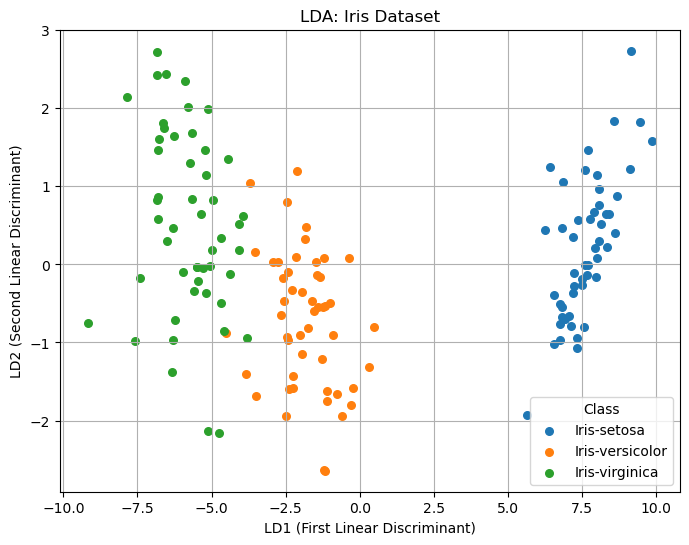

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler

# Veri dosyasını yükle
data_path = r'C:\Users\bbayr\Desktop\Dersler\Machine Learning Applications\Exercise\Exercise III Exploratory Data Analysis\Data_iris-20241111\bezdekIris.data'

# Veri setini yükleyelim
df = pd.read_csv(data_path, header=None)

# Kolon adlarını ekleyelim
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.columns = column_names

# Özellikleri ve sınıf etiketlerini ayıralım
features = df.drop('class', axis=1)
labels = df['class']

# Min-Max Scaling (veri normalizasyonu)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# LDA uygulaması
lda = LinearDiscriminantAnalysis(n_components=2)  # 2 bileşene indirgemek için
lda_features = lda.fit_transform(scaled_features, labels)

# LDA dönüşümünü görselleştirelim
plt.figure(figsize=(8, 6))
for label in labels.unique():
    plt.scatter(lda_features[labels == label, 0], lda_features[labels == label, 1], label=label, s=30)

plt.title('LDA: Iris Dataset')
plt.xlabel('LD1 (First Linear Discriminant)')
plt.ylabel('LD2 (Second Linear Discriminant)')
plt.legend(title='Class')
plt.grid(True)
plt.show()


## Task 5: Examination of preprocessing steps

Use the k-nearest-neighbor algorithm to compare the classification results for different preprocessing steps. Set the number of neighbors to five.

For the comparison, train the algorithm on four differently processed data sets:
1. original data
2. scaled data
3. first two principal components
4. components from the linear discriminant analysis

Evaluate the training results using confusion matrices. Which preprocessing pipeline gives the best results?


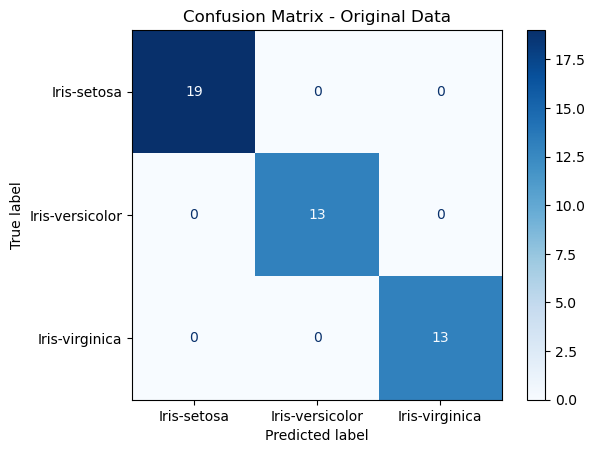

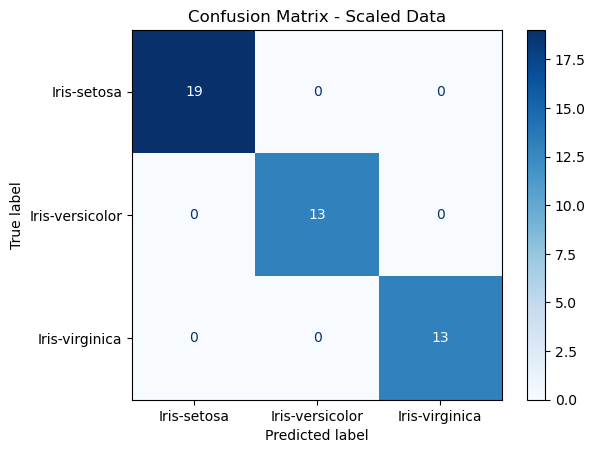

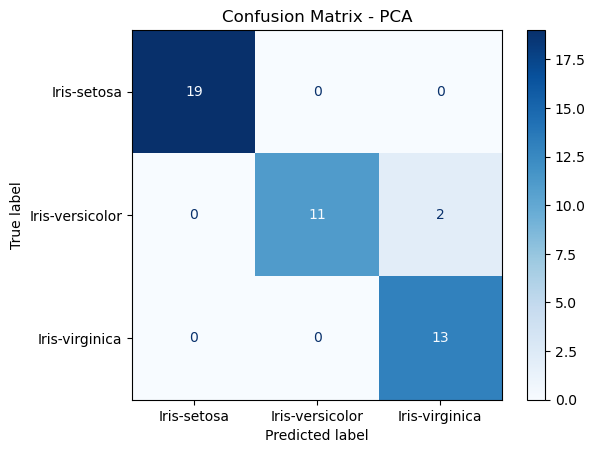

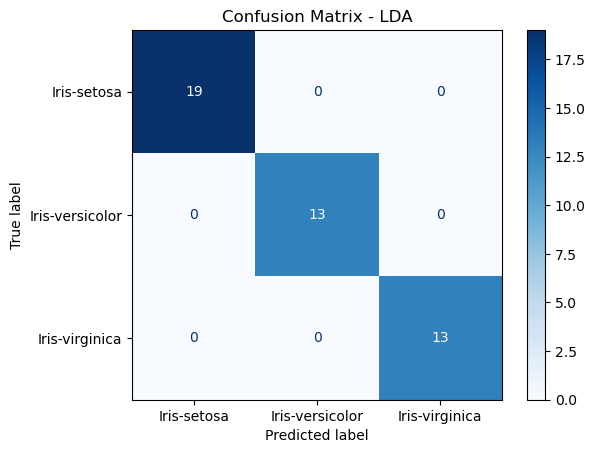

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Veri dosyasını yükle
data_path = r'C:\Users\bbayr\Desktop\Dersler\Machine Learning Applications\Exercise\Exercise III Exploratory Data Analysis\Data_iris-20241111\bezdekIris.data'

# Veri setini yükleyelim
df = pd.read_csv(data_path, header=None)

# Kolon adlarını ekleyelim
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.columns = column_names

# Özellikleri ve sınıf etiketlerini ayıralım
features = df.drop('class', axis=1)
labels = df['class']

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Min-Max Scaling (veri normalizasyonu)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA uygulaması (ilk 2 bileşeni)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# LDA uygulaması (ilk 2 bileşeni)
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# K-NN modelini tanımlayalım
knn = KNeighborsClassifier(n_neighbors=5)

# Orijinal veri ile eğitme ve tahmin
knn.fit(X_train, y_train)
y_pred_original = knn.predict(X_test)

# Ölçeklendirilmiş veri ile eğitme ve tahmin
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)

# PCA bileşenleri ile eğitme ve tahmin
knn.fit(X_train_pca, y_train)
y_pred_pca = knn.predict(X_test_pca)

# LDA bileşenleri ile eğitme ve tahmin
knn.fit(X_train_lda, y_train)
y_pred_lda = knn.predict(X_test_lda)

# Karışıklık matrislerini hesaplayalım ve görselleştirelim
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels.unique())
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Orijinal veri için karışıklık matrisi
plot_confusion_matrix(y_test, y_pred_original, "Confusion Matrix - Original Data")

# Ölçeklendirilmiş veri için karışıklık matrisi
plot_confusion_matrix(y_test, y_pred_scaled, "Confusion Matrix - Scaled Data")

# PCA ile karışıklık matrisi
plot_confusion_matrix(y_test, y_pred_pca, "Confusion Matrix - PCA")

# LDA ile karışıklık matrisi
plot_confusion_matrix(y_test, y_pred_lda, "Confusion Matrix - LDA")
